In [3]:
import torch 
import torch.nn as nn
import numpy as np
import random 


def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

random.seed — to ensure that all random calls are repeatable
np.random.seed — NumPy repeatability
torch.manual_seed — repeatability of tensors and initializations on the CPU
torch.cuda.manual_seed_all — repeatability on the GPU (if there any)

In [4]:
set_seed(42)
print(torch.rand(3))


tensor([0.8823, 0.9150, 0.3829])


In [5]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader 

train_ds = MNIST(
    root="./data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_ds = MNIST(
    root="./data",
    train=False,
    download=True,
    transform=ToTensor()
)

print(len(train_ds))
print(len(test_ds))
print(len(train_ds.classes))


train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=1024, shuffle=False)



60000
10000
10


I saw that there were two elements in one batch, that the dataset was correctly formed, and I saw that the batch is a list

In [6]:
batch = next(iter(train_loader))
print(type(batch))
print(len(batch))

<class 'list'>
2


epoch=01 | train_loss=0.4125 | test_loss=0.2163 | test_acc=0.9391
epoch=02 | train_loss=0.1877 | test_loss=0.1532 | test_acc=0.9569
epoch=03 | train_loss=0.1346 | test_loss=0.1288 | test_acc=0.9640
epoch=04 | train_loss=0.1058 | test_loss=0.1051 | test_acc=0.9694
epoch=05 | train_loss=0.0849 | test_loss=0.0986 | test_acc=0.9713
epoch=06 | train_loss=0.0714 | test_loss=0.0848 | test_acc=0.9745
epoch=07 | train_loss=0.0593 | test_loss=0.0839 | test_acc=0.9748
epoch=08 | train_loss=0.0510 | test_loss=0.0763 | test_acc=0.9771
epoch=09 | train_loss=0.0433 | test_loss=0.0752 | test_acc=0.9775
epoch=10 | train_loss=0.0368 | test_loss=0.0745 | test_acc=0.9774
{'optimizer': 'Adam', 'lr': 0.001, 'activation': 'ReLU', 'epochs': 10, 'hidden': 128, 'final_test_acc': 0.9774}


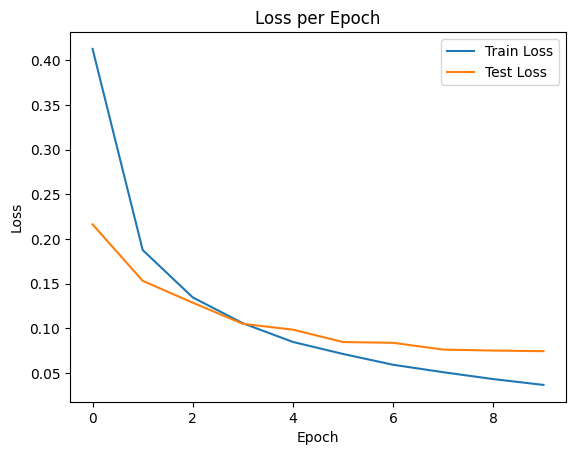

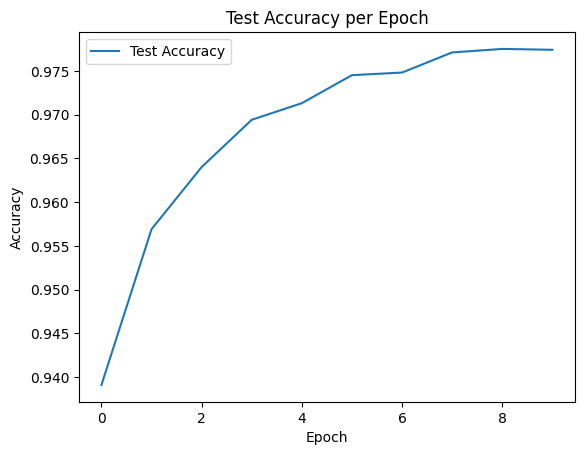

In [7]:
class MNIST_MLP(nn.Module):
    def __init__(self, hidden=128):
        super().__init__()
        self.fc1 = nn.Linear(28*28, hidden)
        self.act = nn.ReLU()
        self.fc2 = nn.Linear(hidden, 10)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)   
        x = self.fc1(x)            
        x = self.act(x)
        x = self.fc2(x)            
        return x 


model = MNIST_MLP(hidden=128)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 10

train_losses = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    train_loss_sum = 0.0

    for x_batch, y_batch in train_loader:
        logits = model(x_batch)
        loss = criterion(logits, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss_sum += loss.item()

    train_loss = train_loss_sum / len(train_loader)

    model.eval()
    test_loss_sum = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            logits = model(x_batch)
            loss = criterion(logits, y_batch)

            preds = logits.argmax(dim=1)
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

            test_loss_sum += loss.item()

    test_loss = test_loss_sum / len(test_loader)
    test_acc = correct / total

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"epoch={epoch+1:02d} | train_loss={train_loss:.4f} | test_loss={test_loss:.4f} | test_acc={test_acc:.4f}")

print({
  "optimizer": "Adam",
  "lr": 1e-3,
  "activation": "ReLU",
  "epochs": EPOCHS,
  "hidden": 128,
  "final_test_acc": test_acc,
})

import matplotlib.pyplot as plt

# Loss
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.legend()
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig("../assets/loss_curve1.png")
plt.show()

# Accuracy
plt.figure()
plt.plot(test_accuracies, label="Test Accuracy")
plt.legend()
plt.title("Test Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.savefig("../assets/accuracy_curve1.png")
plt.show()
